In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
from scipy.optimize import curve_fit
from uncertainties import ufloat
from uncertainties import unumpy as unp
import array_to_latex as a2l
import csv
import pandas as pd
from astropy.io.votable import parse
from astropy.table import QTable, Table, Column

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) #font na grafih je LaTexov
rc('text', usetex=True)

In [2]:
def linearna(x, k, n): 
    return k*x + n 

In [39]:
data_air = np.array(pd.read_csv('meas_air.csv', delimiter=';'))
data_si = np.array(pd.read_csv('meas_si.csv', delimiter=';'))

Pz_air = data_air[:, 0]
Iz_air = data_air[:, 1]
Uz_air = data_air[:, 2]
Ps_air = data_air[:, 3]

Pz_si = data_si[:, 0]
Iz_si = data_si[:, 1]
Uz_si = data_si[:, 2]
Ps_si = data_si[:, 3]

In [40]:
R0 = unp.uarray([123.4], [0.1])
d = unp.uarray([74e-2], [1e-2])

In [41]:
prost_kot = 1e-4 / (d ** 2)

Ps_air_p = 1 / prost_kot * Ps_air

Ps_si_p = (1 / prost_kot) * Ps_si

k_air, _ = curve_fit(linearna, Pz_air, unp.nominal_values(Ps_air_p))

k_si, _ = curve_fit(linearna, Pz_si, unp.nominal_values(Ps_si_p))

Ps_si_p

array([0.90354+/-0.02442, 0.783068+/-0.021164000000000002,
       0.76664+/-0.020720000000000002,
       0.7173560000000001+/-0.019388000000000002,
       0.668072+/-0.018056000000000003, 0.607836+/-0.016428,
       0.5432192+/-0.014681600000000003, 0.4594364+/-0.012417200000000002,
       0.4276756+/-0.011558800000000003, 0.3636064+/-0.009827200000000001,
       0.29734679999999997+/-0.0080364, 0.2261588+/-0.006112400000000001,
       0.1812556+/-0.004898800000000001,
       0.1106152+/-0.0029896000000000002,
       0.062974+/-0.0017020000000000002], dtype=object)

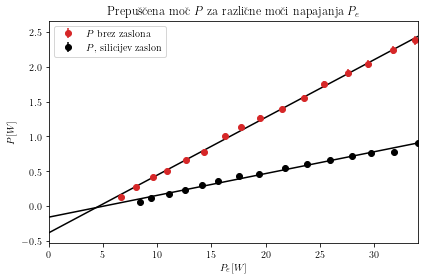

In [44]:
fig, ax = plt.subplots()

ax.errorbar(Pz_air, unp.nominal_values(Ps_air_p), yerr=unp.std_devs(Ps_air_p), color='tab:red', linestyle='none', marker='o', label=r'$P$ brez zaslona')
ax.errorbar(Pz_si, unp.nominal_values(Ps_si_p), yerr=unp.std_devs(Ps_si_p), color='k', linestyle='none', marker='o', label=r'$P$, silicijev zaslon')

Pz_lin = np.linspace(0, 35)

ax.plot(Pz_lin, linearna(Pz_lin, *k_air), color='k', zorder=-1)
ax.plot(Pz_lin, linearna(Pz_lin, *k_si), color='k', zorder=-1)

ax.set_title(r'Prepuščena moč $P$ za različne moči napajanja $P_e$')
ax.set_xlabel(r'$P_e [W]$')
ax.set_ylabel(r'$P [W]$')
ax.set_xlim(0, 34)
ax.legend()
fig.tight_layout()
fig.savefig('PPe.pdf')